# Classification of MEPs' Tweets

*Assignment 3*  
*Business Analytics Practicum I*  
*Brikena Kokalari P2821811*

You will investigate a dataset of tweets made by Members of the European Parliament. You will use data collected by Darko Cherepnalkoski, Andreas Karpf, Igor Mozetič, and Miha Grčar for their paper [Cohesion and Coalition Formation in the European Parliament: Roll-Call Votes and Twitter Activities](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0166586) (while you are at it, why not read the paper as well?).

This assignment is based on an original assignment by Ioannis Pavlopoulos (postdoc researcher) and Vasiliki Kougia (PhD candidate at AUEB).

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr



The dataset contains all retweets between MEPs between 1.10.2014 and 1.3.2016 in CSV format. 

Description of columns:
- origUserId: the Twitter id of the MEP that posted the original tweet
- origUserScreenName: the Twitter name of the MEP that posted the original tweet
- origMepId: the mepId of the MEP that posted the original tweet
- origMepName: the name of the MEP that posted the original tweet
- origMepGroupId: the European group id of the MEP that posted the original tweet
- origMepGroupShort: the shortened European group name of the MEP that posted the original tweet
- origMepCountryId: the country id of the MEP that posted the original tweet
- origMepCountryShort: the shortened country name of the MEP that posted the original tweet
- retweetUserId: the Twitter id of the MEP that posted the retweet
- retweetUserScreenName: the Twitter name of the MEP that posted the retweet
- retweetMepId: the mepId of the MEP that posted the retweet
- retweetMepName: the name of the MEP that posted the retweet
- retweetMepGroupId: the European group id of the MEP that posted the retweet
- retweetMepGroupShort: the shortened European group name of the MEP that posted the retweet
- retweetMepCountryId: the country id of the MEP that posted the retweet
- retweetMepCountryShort: the shortened country name of the MEP that posted the retweet
- origCreatedAt: the timestamp of the original tweet
- origTweetId: the Twitter id of the original tweet
- retweetCreatedAt: the timestamp of the retweet
- retweetTweetId: the Twitter id of the retweet
- lang: the language of the original tweet

Let's import all the library that we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
import os
from dotenv import load_dotenv
import re as reg
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import sklearn as sk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import time
import os
from nltk.stem.porter import PorterStemmer
#Importing the required classifier modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to C:\Users\Brikena
[nltk_data]     Kokalari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Brikena
[nltk_data]     Kokalari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import timeit
start = timeit.default_timer()

In [3]:
#read the data
data = pd.read_csv('retweets.csv', delimiter = ',')

In [4]:
data=data.loc[data['lang'] == 'en']

In [5]:
data.dtypes

origUserId                 int64
origUserScreenName        object
origMepId                  int64
origMepName               object
origMepGroupId             int64
origMepGroupShort         object
origMepCountryId           int64
origMepCountryShort       object
retweetUserId              int64
retweetUserScreenName     object
retweetMepId               int64
retweetMepName            object
retweetMepGroupId          int64
retweetMepGroupShort      object
retweetMepCountryId        int64
retweetMepCountryShort    object
origCreatedAt             object
origTweetId                int64
retweetCreatedAt          object
retweetTweetId             int64
lang                      object
dtype: object

In [6]:
# Authenticate to Twitter
#
auth = tweepy.OAuthHandler("XXX", "XXX")
auth.set_access_token("XX-XXXX","XXX")
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [7]:
tweet_list = data.origTweetId.tolist()

In [8]:
tweet_id = []
tweet = []

In [9]:
for j in range(0,len(tweet_list),100):
    tweets = api.statuses_lookup(tweet_list[j:j+100]) 
    try:
        for i in tweets:
            tweet_id.append(i.id)
            tweet.append(i.text)
        print(j)
    except Exception:
        #print('error')
        pass

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700


In [10]:
len(tweet_list)

13796

In [11]:
tweet_id = list(map(int, tweet_id))

One approach to create pandas dataframe from one or more lists is to create a dictionary first. Let us make a dictionary with two lists such that Tweet IDs as keys and the text of the tweet as values

In [12]:
df = {'origTweetId':tweet_id,'tweet':tweet}

In [13]:
df = pd.DataFrame(df)
df.head(5)

,origTweetId,tweet
0,519050739642286080,Lord Hill's written answers to EP are now on m...
1,519139901359783936,Our @SebDance asks @ABratusek about global cli...
2,518024241024073728,I write for @LabourList Tory threat to Court o...
3,519109106272317440,"“@Ashleyfoxmep: and named her party ""the Allia..."
4,518721908951769088,Good luck to @TheProgressives in Bulgaria toda...


In [14]:
df.set_index('origTweetId', inplace=True)

In [15]:
df1 = pd.merge(data, df, left_on='origTweetId', right_index=True, how='inner')

In [16]:
df1.head(5)

,origUserId,origUserScreenName,origMepId,origMepName,origMepGroupId,origMepGroupShort,origMepCountryId,origMepCountryShort,retweetUserId,retweetUserScreenName,...,retweetMepGroupId,retweetMepGroupShort,retweetMepCountryId,retweetMepCountryShort,origCreatedAt,origTweetId,retweetCreatedAt,retweetTweetId,lang,tweet
3,19017675,Nigel_Farage,4525,Nigel FARAGE,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed Jul 04 11:05:03 +0000 2012,220473289259233285,Sun Dec 07 21:46:00 +0000 2014,541710240014942209,en,Euro Parliament votes overwhelmingly to reject...
5,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,1668992125,NathanGillMEP,...,6,EFDD,27,GBR,Fri Jul 05 08:00:23 +0000 2013,353060776707235841,Thu Jun 18 08:52:51 +0000 2015,611456527409524736,en,"US have one currency, one Central Bank and one..."
11,17675072,MartinSchulz,1911,Martin SCHULZ,1,S&D,10,DEU,21648649,maritaulvskog,...,1,S&D,26,SWE,Sat May 17 12:47:17 +0000 2014,467647542378123264,Wed Sep 16 09:15:06 +0000 2015,644077036022165504,en,More jobs for young people is my top priority ...
12,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,121171051,MargotLJParker,...,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Thu Dec 04 22:21:10 +0000 2014,540631925145493504,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."
13,744743599,Tim_Aker,99650,Tim AKER,6,EFDD,27,GBR,19017675,Nigel_Farage,...,6,EFDD,27,GBR,Wed May 28 16:47:44 +0000 2014,471694322472353793,Sun Mar 29 18:53:32 +0000 2015,582254277122473984,en,"Vote #Labour, get Tory. Vote Tory, get Labour...."


In [17]:
print("number of unique values in col 'tweet' %d" %  df1['tweet'].nunique())
print("number of unique values in col 'origTweetId' %d" %  df1['origTweetId'].nunique())

number of unique values in col 'tweet' 10165
number of unique values in col 'origTweetId' 10167


In [18]:
#remove duplicates
df1 = df1.drop_duplicates(subset='tweet', keep="last")

In [19]:
print("number of unique values in col 'tweet' %d" %  df1['tweet'].nunique())
print("number of unique values in col 'origTweetId' %d" %  df1['origTweetId'].nunique())

number of unique values in col 'tweet' 10165
number of unique values in col 'origTweetId' 10165


In [20]:
#save the dataset for later preprocessing
df1.to_csv('alltweets.csv', index = None, header=True)

In [21]:
data=pd.read_csv('alltweets.csv', delimiter = ',')

In [22]:
df1=data.groupby('origMepGroupShort').size()
df1

origMepGroupShort
ALDE          1457
ECR            966
EFDD          2418
ENL             21
EPP           1638
GUE-NGL        304
Greens-EFA     953
NI               1
S&D           2407
dtype: int64

There are two groups with less than 50 tweets, **ENL** & **NI**,hence we are removig them

In [23]:
#drop groups with very few tweets (less than 50)
data = data[data.origMepGroupShort != 'ENL']
data = data[data.origMepGroupShort != 'NI']
data.to_csv('alldata.csv', index = None, header=True)

## EXPLONATORY DATA ANALYSIS- CLEANING

We are going to make some extra cleaning of the tweets.

In [24]:
data = pd.read_csv('alldata.csv', delimiter = ',')

In [25]:
df = data[['tweet', 'origMepGroupShort']]

#### What hashtags are being used the most?

First, lets use a function  in a way that we can extract the hashtags and not remove them!
Let's first create a wordcloud of the most commonly used hashtags! This requires us to put the word list as a single string separated by spaces. The algorithm then counts the number of times each term appears and makes the words bigger/bolder commensurate to their frequency!

In [26]:
# in case hashtags are not found, we will use "0" as the placeholder
def extract_hashtags(tweet):
    '''Provide a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

# make a new column to store the extracted hashtags and view them!
df['tweet_hashtags'] = df['tweet'].map(extract_hashtags)
df['tweet_hashtags'].head(10)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


0              [#ACTA]
1                  [0]
2            [#EP2014]
3    [#Labour,, #UKIP]
4                  [0]
5       [#opportunist]
6        [#UKIP, #NHS]
7    [#AskTeamJuncker]
8         [#Migration]
9                  [0]
Name: tweet_hashtags, dtype: object

Next we need to extract all unique hashtags from the hashtags column just created and take a value count on those!

In [27]:
# create a list of all hashtags
all_hashtags = df['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

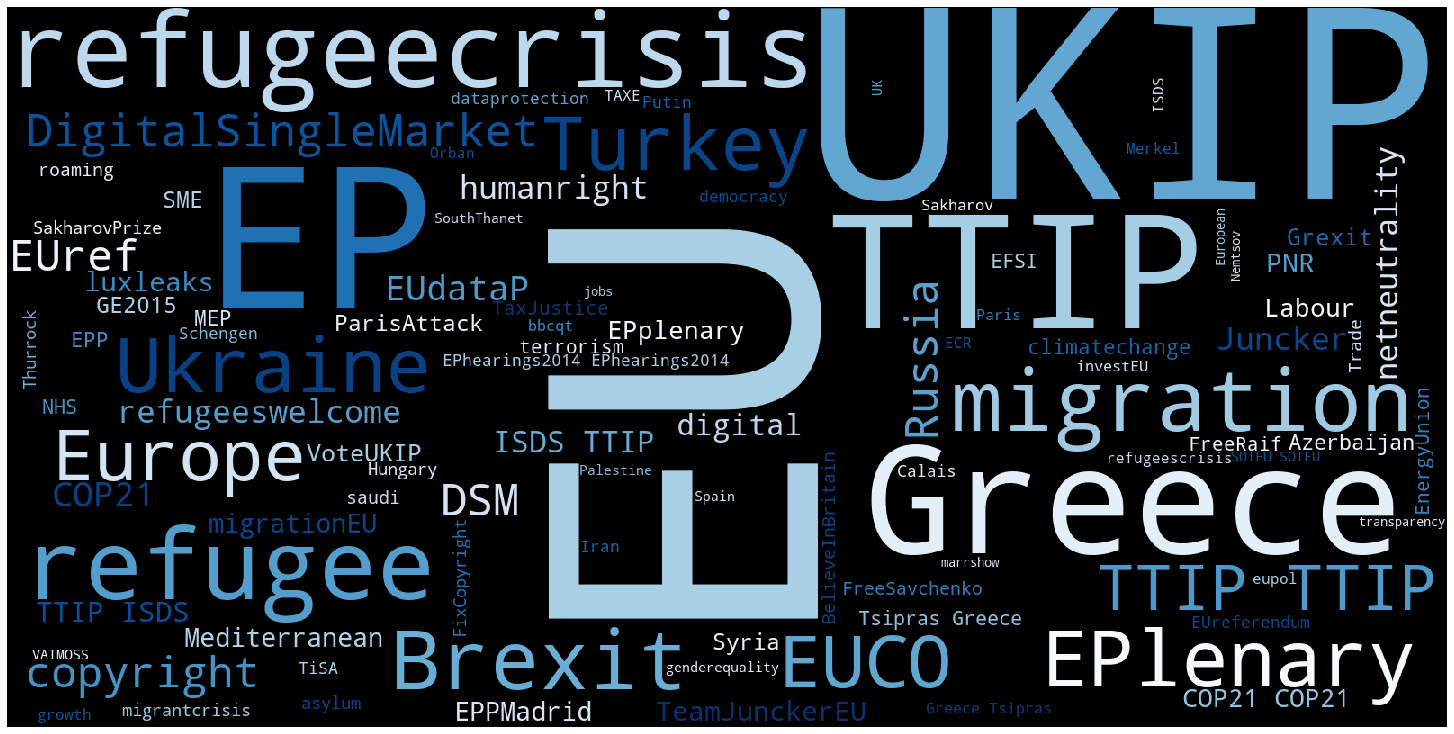

In [28]:
# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [29]:
#delete the excta col of visualization
del df['tweet_hashtags']
df.head(5)

,tweet,origMepGroupShort
0,Euro Parliament votes overwhelmingly to reject...,EFDD
1,"US have one currency, one Central Bank and one...",S&D
2,More jobs for young people is my top priority ...,S&D
3,"Vote #Labour, get Tory. Vote Tory, get Labour....",EFDD
4,Answering my question in ECR Group J-C Juncker...,ECR
5,Robert Halfon raising issue of illegal travell...,EFDD
6,"Ignore the Labour lies, this is where #UKIP st...",EFDD
7,Next week I'll be grilling EU Commissioner can...,ALDE
8,#Migration can be positive for the UK - only i...,EFDD
9,"""Vote UKIP, get Labour"" says Dave. Really...? ...",EFDD


Most text data will likely need some processing in order for the chosen machine learning algorithm to perform well. In this case each text document is a tweet and therefore will contain lots of characters that will not be meaningful to any machine learning algorithm. You can see below from just viewing the first few rows of the data that the tweets contain characters such as #, @ and punctuation marks.
Text and document classification over social media, such as Twitter, Facebook, and so on is usually affected by the noisy nature (abbreviations, irregular forms) of the text corpora.That's why we are going to clean it.

In [30]:
#remove accents from values in columns
df['tweet'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

0        Euro Parliament votes overwhelmingly to reject...
1        US have one currency, one Central Bank and one...
2        More jobs for young people is my top priority ...
3        Vote #Labour, get Tory. Vote Tory, get Labour....
4        Answering my question in ECR Group J-C Juncker...
5        Robert Halfon raising issue of illegal travell...
6        Ignore the Labour lies, this is where #UKIP st...
7        Next week I'll be grilling EU Commissioner can...
8        #Migration can be positive for the UK - only i...
9        "Vote UKIP, get Labour" says Dave. Really...? ...
10       good presentation of Jonathan Hill, ready to t...
11       Hungary is a shining model for other countries...
12       Steven Woolfe's magisterial question to Lord H...
13       #EPhearings2014 @BienkowskaEU 'lets put Europe...
14       Bienkowska fluffed a simple question from @Ash...
15       #Bienkowska committed to fast and fully enforc...
16       Decision on Moscovici postponed #EPHearing2014.

In [31]:
#remove stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df.head(5)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet,origMepGroupShort
0,Euro Parliament votes overwhelmingly reject #A...,EFDD
1,"US one currency, one Central Bank one Govt. Eu...",S&D
2,More jobs young people top priority EU @social...,S&D
3,"Vote #Labour, get Tory. Vote Tory, get Labour....",EFDD
4,Answering question ECR Group J-C Juncker confi...,ECR


In [32]:
# this method checks for links and removes these from the tweet provided!
from urllib.parse import urlparse
#https://stackoverflow.com/a/52455972
def is_url(url):
    try:
        result = urlparse(url)
        return all([result.scheme, result.netloc])
    except ValueError:
        return False

df['tweet'] = [' '.join(y for y in x.split() if not is_url(y)) for x in df['tweet']]
print (df)

                                                   tweet origMepGroupShort
0      Euro Parliament votes overwhelmingly reject #A...              EFDD
1      US one currency, one Central Bank one Govt. Eu...               S&D
2      More jobs young people top priority EU @social...               S&D
3      Vote #Labour, get Tory. Vote Tory, get Labour....              EFDD
4      Answering question ECR Group J-C Juncker confi...               ECR
5      Robert Halfon raising issue illegal traveller ...              EFDD
6                  Ignore Labour lies, #UKIP stands #NHS              EFDD
7      Next week I'll grilling EU Commissioner candid...              ALDE
8                #Migration positive UK - controlled! RT              EFDD
9          "Vote UKIP, get Labour" says Dave. Really...?              EFDD
10     good presentation Jonathan Hill, ready take al...               EPP
11     Hungary shining model countries, says #Navracs...              ALDE
12     Steven Woolfe's ma

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [33]:
def remove_extraneous(tweet):
    '''Given a text, remove unnecessary characters from the beginning and the end'''
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

df['tweet'] = df['tweet'].map(remove_extraneous)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


*If we use the below code, we remove the whole mention from the tweet. By doing so, the accuracy decreases. This means that mention gives us more info about the content of the tweet. However, if remove only the **@** , we achive a better accuracy. 

**Below I am removing only the **@**.

In [34]:
# # Now lets remove the mentions from the tweet text
# def remove_mentions(tweet):
#     '''Given a text, remove the user mentions'''
#     mentions = []
#     if len(re.findall('@[^\s@]+', tweet))>0:
#         tweet = re.sub('@[^\s@]+', "" , tweet)
#         mentions.append(tweet)
#     else:
#         mentions.append(tweet)
#     return mentions[0]

# df['tweet'] = df['tweet'].map(remove_mentions)

In [35]:
#remove only the "@"
df['tweet']= df['tweet'].str.replace('@', '')
df.head(10)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet,origMepGroupShort
0,Euro Parliament votes overwhelmingly reject #A...,EFDD
1,"US one currency, one Central Bank one Govt Eur...",S&D
2,More jobs young people top priority EU sociald...,S&D
3,"Vote #Labour, get Tory Vote Tory, get Labour V...",EFDD
4,Answering question ECR Group J-C Juncker confi...,ECR
5,Robert Halfon raising issue illegal traveller ...,EFDD
6,"Ignore Labour lies, #UKIP stands #NHS",EFDD
7,Next week I'll grilling EU Commissioner candid...,ALDE
8,#Migration positive UK - controlled! RT,EFDD
9,"""Vote UKIP, get Labour"" says Dave Really?",EFDD


In [36]:
#remove hashtags #
df['tweet']= df['tweet'].str.replace('#', '')
df.head(10)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet,origMepGroupShort
0,Euro Parliament votes overwhelmingly reject AC...,EFDD
1,"US one currency, one Central Bank one Govt Eur...",S&D
2,More jobs young people top priority EU sociald...,S&D
3,"Vote Labour, get Tory Vote Tory, get Labour Vo...",EFDD
4,Answering question ECR Group J-C Juncker confi...,ECR
5,Robert Halfon raising issue illegal traveller ...,EFDD
6,"Ignore Labour lies, UKIP stands NHS",EFDD
7,Next week I'll grilling EU Commissioner candid...,ALDE
8,Migration positive UK - controlled! RT,EFDD
9,"""Vote UKIP, get Labour"" says Dave Really?",EFDD


In [37]:
#remove pancuations
df["tweet"] = df['tweet'].str.replace('[^\w\s]','')
df.head(10)

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet,origMepGroupShort
0,Euro Parliament votes overwhelmingly reject AC...,EFDD
1,US one currency one Central Bank one Govt Euro...,S&D
2,More jobs young people top priority EU sociald...,S&D
3,Vote Labour get Tory Vote Tory get Labour Vote...,EFDD
4,Answering question ECR Group JC Juncker confir...,ECR
5,Robert Halfon raising issue illegal traveller ...,EFDD
6,Ignore Labour lies UKIP stands NHS,EFDD
7,Next week Ill grilling EU Commissioner candida...,ALDE
8,Migration positive UK controlled RT,EFDD
9,Vote UKIP get Labour says Dave Really,EFDD


If both upper and lower case versions of the same word are found in the text then the algorithm will count them as different words even though the meaning is the same. Of course this does mean that where the capitalised versions of a word exists, that does have a different meaning. For example the company Apple vs the fruit apple. This could result in poorer performance for some data sets. This is one area of NLP where we may try different methods to see how they affect the overall performance of the model.However in this case ,we will use the most common approach, which is to reduce everything to lower case.

In [38]:
#lower cases
df['tweet']= df['tweet'].str.lower()

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df.to_csv('classificationdata.csv', index = None, header=True)

# CLASSIFICATION 



* Train at least two algorithms to learn to classify an unseen tweet. The target variable should be the political party of the original poster and the training features should be the original tweet's text.

* You should split your data to training and testing datasets, try the different algorithms with cross validation on the training dataset, and find the best hyperparameters for the best algorithm. 

* The tweet texts must be converted to a format suitable the classification, bag of word matrices or tf-idf matrices. You must investigate which one gives the best results. 

* You may want to strip accents, convert everything to lowercase, and remove all English stopwords. In general, you may experiment with additional ideas about how best to tokenize etc.

* Report your scores; once you find the best algorithm and the best hyperparameters, report the score on the test data.

* To gauge the efficacy of the algorithm, report also the results of a baseline classifier, using, for instance, scikit-learn's [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

In [40]:
df = pd.read_csv('classificationdata.csv', delimiter = ',')


Let's have some insight of the data. The below bar chat shows the frequency of each political party.

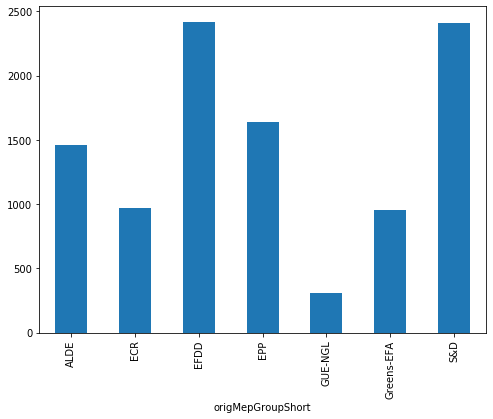

In [41]:
fig = plt.figure(figsize=(8,6))
df.groupby('origMepGroupShort').tweet.count().plot.bar(ylim=0)
plt.show()

# Training

Machines are not capable of reading text in the same way as humans do. In order for a machine learning algorithm to determine patterns in text it must first be converted into a numeric structure. One of the most common techniques for this is called Bag of Words, or BoW.

A BoW model splits the words in a piece of text into tokens disregarding grammar and word order. The model also counts the frequency in which a word occurs in the text, and assigns a weight proportional to this frequency. The output is a matrix of term frequencies where each row represents the text and each column a word in the vocabulary.

Sci-kit learn has a number of built in functions to perform this type of modelling. But for this walkthrough I am going to be using one of the most simple functions which is CountVectoriser. This function works quite well with the default settings so I will use those for the first iteration of my model.

BoW model which we are using to process the text has three steps. CountVectoriser accomplishes the first two, splitting the words into tokens and counting the frequency. We will use another scikit-learn function as well, called TfidfTransformer to apply the frequency weighting.


In [42]:
X= df.tweet
y = df.origMepGroupShort

Before training the model I am splitting the training data into a training and test set.

In [43]:
#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2,shuffle = True , stratify=y)

Before we let our data to train we have to numerically represent the preprocessed data. The well-known techniques for vectorization of words in Natural Language Processing are: 
- CountVectorization
- Tf-IDF transformation
- Chosen classifier

For simplicity and reproducibility I am going to use a sci-kit learn pipeline, which is a built-in function of scikit-learn to pre-define a workflow of algorithm, starting with a SGDClassifier. This saves much time and computational power.

The below code creates a pipeline object that when used will apply each step to the data.

#### Stochstic Gradient Descent

In [44]:
sdg_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('sdg', SGDClassifier()),
                    ])

sdg_clf.fit(X_train, y_train)
predicted = sdg_clf.predict(X_test)
np.mean(predicted == y_test)


0.6352883193691473

In [45]:
#cross validation
scores = cross_val_score(sdg_clf, X, y, cv=5)
s1 = scores.mean()
s1
print('Mean of 5-fold cross validation for SGD: ' , "{:.2%}".format(scores.mean()))

Mean of 5-fold cross validation for SGD:  59.19%


#### Multinomial Naive Bayes Classifier

In [46]:
mnb_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('mnb', MultinomialNB()),
                    ])

mnb_clf.fit(X_train, y_train)
predicted = mnb_clf.predict(X_test)
np.mean(predicted == y_test)


0.5524889107934944

In [47]:
#cross validation
scores = cross_val_score(mnb_clf, X, y, cv=5)
s2 = scores.mean()
s2
print('Mean of 5-fold cross validation for Multinomial:' , "{:.2%}".format(scores.mean()))

Mean of 5-fold cross validation for Multinomial: 51.07%


#### Suppert Vector Classification

In [48]:
svc_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('scv', SVC(kernel='linear')),
                    ])

svc_clf.fit(X_train, y_train)
predicted = svc_clf.predict(X_test)
np.mean(predicted == y_test)


0.6274026614095614

In [49]:
#cross validation
scores = cross_val_score(svc_clf, X, y, cv=5)
s3 = scores.mean()
s3
print('Mean of 5-fold cross validation for SVC regression: ' , "{:.2%}".format(scores.mean())) #47

Mean of 5-fold cross validation for SVC regression:  57.59%


#### Multiclass Logistic Regression

In [50]:
log_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('log', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
                    ])

log_clf.fit(X_train, y_train)
predicted = log_clf.predict(X_test)
np.mean(predicted == y_test)
#0.534

0.6145884672252341

In [51]:
#cross validation
scores = cross_val_score(log_clf, X, y, cv=5)
s4 = scores.mean()
s4
print('Mean of 5-fold cross validation for logistic regression:' , "{:.2%}".format(scores.mean()))
#0.48

Mean of 5-fold cross validation for logistic regression: 57.43%


#### Random Forest

In [52]:
rf_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('rf', RandomForestClassifier(n_estimators=500, random_state=0)),
                    ])

rf_clf.fit(X_train, y_train)
predicted = rf_clf.predict(X_test)
np.mean(predicted == y_test)
#0.534

0.5623459832429768

In [53]:
#cross validation
scores = cross_val_score(rf_clf, X, y, cv=5)
s5 = scores.mean()
s5
print('Mean of 5-fold cross validation for Random Forest:' , "{:.2%}".format(scores.mean()))
#0.48

Mean of 5-fold cross validation for Random Forest: 53.71%


#### KNeighborsClassifier

In [54]:
kn_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('kn', KNeighborsClassifier()),
                    ])

kn_clf.fit(X_train, y_train)
predicted = kn_clf.predict(X_test)
np.mean(predicted == y_test)


0.5608674223755544

In [55]:
#cross validation
scores = cross_val_score(kn_clf, X, y, cv=5)
s6 = scores.mean()
s6
print('Mean of 5-fold cross validation for KNeighborsClassifier: ' , "{:.2%}".format(scores.mean()))

Mean of 5-fold cross validation for KNeighborsClassifier:  48.93%


#### Decision Tree

In [56]:
from sklearn import tree
dt_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('df', tree.DecisionTreeClassifier()),
                    ])

dt_clf.fit(X_train, y_train)
predicted = dt_clf.predict(X_test)
np.mean(predicted == y_test)
#0.40

0.4770823065549532

In [57]:
#cross validation
scores = cross_val_score(dt_clf, X, y, cv=5)
s7 = scores.mean()
s7
print('Mean of 5-fold cross validation for DecisionTreeClassifier:' , "{:.2%}".format(scores.mean()))
#0.35

Mean of 5-fold cross validation for DecisionTreeClassifier: 45.29%


#### Dummy Classifier

In [58]:
dum_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                     ('dum', DummyClassifier()),
                    ])

dum_clf.fit(X_train, y_train)
predicted = dum_clf.predict(X_test)
np.mean(predicted == y_test)
#0.18

0.1641202562838837

In [59]:
#cross validation
scores = cross_val_score(dum_clf, X, y, cv=5)
s8 = scores.mean()
s8
print('Mean of 5-fold cross validation for dummy classifier:' , "{:.2%}".format(scores.mean()))
#0.18

Mean of 5-fold cross validation for dummy classifier: 17.99%


In [60]:
scores_df = pd.DataFrame({'Scores':[s1,s2,s3,s4,s5,s6,s7,s8], 'Classifier':['SGDClassifier', 'MultinomialNB', 'SVC', 'LogisticRegression', 'Random Forest', 'KNeighborsClassifier', 'DecisionTreeClassifier' ,'DummyClassifier']})

In [61]:
scores_df

,Scores,Classifier
0,0.591922,SGDClassifier
1,0.510693,MultinomialNB
2,0.575851,SVC
3,0.574278,LogisticRegression
4,0.537103,Random Forest
5,0.489303,KNeighborsClassifier
6,0.452902,DecisionTreeClassifier
7,0.179926,DummyClassifier


Obviusly we are doing better than the **Dummy classifier**, with the SGDClassifier, SVC and LogisticRegression having the best score so far. For the first four classifiers, I'm going to find the best optimization of accuracy, playing with the parameters.

### OPTIMIZATION

### Tuning Hyper Parameters Using Grid Search

There are many parameters that affect the performance of our models. For each model I am trying to change the some parameters to check if the performance is improved.

*Setting parameters for SGDClassifier*

In [62]:
parameters1 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'vect__max_df':(0.2,0.5,0.7,0.9),
              'vect__min_df': (5,10,15,20),
              'sdg__alpha': (1e-2,1e-1)       
             }           

*Setting parameters for Multinomial Naive Bayes classifier*

In [63]:
parameters2 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'vect__max_df':(0.5,0.7,0.9),
              'vect__min_df': (5,10,20),
              'mnb__alpha': np.linspace(0.5, 1.5, 6),
              'mnb__fit_prior': [True, False]
             }
              

*Setting parameters for Support Vector Classifier*

In [64]:
parameters3 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'vect__max_df':(0.5,0.7,0.9),
              'vect__min_df': (5,10,20),
              'scv__kernel':  ['linear', 'rbf'],
              
             }
              

*Setting parameters for Logistic Regression*

In [65]:
parameters4 = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'vect__max_df':(0.5,0.7,0.9),
              'vect__min_df': (5,10,20),
              'log__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'log__solver': ['sag', 'lbfgs'],
             }
              

In [66]:
gs_clf1 = GridSearchCV(sdg_clf, parameters1, n_jobs=-1, cv=5)
gs_clf2 = GridSearchCV(mnb_clf, parameters2, n_jobs=-1, cv=5)
gs_clf3 = GridSearchCV(svc_clf, parameters3, n_jobs=-1, cv=5)
gs_clf4 = GridSearchCV(log_clf, parameters4, n_jobs=-1, cv=5)

In [67]:
#Attention! this takes a lot to run!
#fit the model
gs_clf1 = gs_clf1.fit(X_train, y_train)
gs_clf2 = gs_clf2.fit(X_train, y_train)
gs_clf3 = gs_clf3.fit(X_train, y_train)
gs_clf4 = gs_clf4.fit(X_train, y_train)


c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Improvements

Let's see if the accuracy improved chosing the best parameters for each model

**SGDClassifier**

In [68]:
predicted_gs = gs_clf1.predict(X_test)
np.mean(predicted_gs == y_test)

0.602267126663381

In [69]:
gs_clf1.best_params_

{'sdg__alpha': 0.01,
 'tfidf__use_idf': True,
 'vect__max_df': 0.2,
 'vect__min_df': 5,
 'vect__ngram_range': (1, 2)}

In [70]:
gs_clf1.best_score_

0.5881192999753513

 1,03% Improvment on SGDClassifier 

**Multinomial Naive Bayes**

In [71]:
predicted_gs = gs_clf2.predict(X_test)
np.mean(predicted_gs == y_test)

0.6047313947757516

9,4% Improvement in accuracy on Multinomial Naive Bayes

**Support Vector Classifier**

In [72]:
predicted_gs = gs_clf3.predict(X_test)
np.mean(predicted_gs == y_test)

0.6002957121734844

2,44% Improvement on Support Vector Classifier

**Logistic Regression**

In [73]:
predicted_gs = gs_clf4.predict(X_test)
np.mean(predicted_gs == y_test)

0.602267126663381

2,69% Improvement on Logistic Regreesion


Clearly we can see SGD, Logistic Regression, Multinomial Naive Bayes and Support Vector Classifier perform better than other classifiers. The best score so far is 60%.

![title](log.jpg)

# TfidfVectorizer

### Vectorize Using TfidfVectorizer

In a corpus, several common words makes up lot of space which carry very little information about content of document.
If we feed these counts directly to a classifier(like the above code) then those frequently occurring words will shadow the real interesting terms of the document.
So we re-weight count feature vectors using tf-idf transform method and then feed the data into classifier for better classification.
TfidfVectorizer combines all options of CountVectorizer and TfidfTransformer in a single model. It converts a collection of raw documents to a matrix of TF-IDF features.The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

*Let's try using TfidfVectorizer*

In [74]:
corpus=list(df.tweet)

In [75]:
vectorizer = TfidfVectorizer(min_df = 0.05,max_df =0.9,strip_accents = 'unicode', lowercase =True)
X = vectorizer.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

In [76]:
#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2,shuffle = True , stratify=y)

In [77]:
#function to create different classifiers
from sklearn.metrics import accuracy_score
def classifier(object):
    classifier = object
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    return cm,acc

**Multinomial Naive Bayes**

In [78]:
print(classifier(MultinomialNB()))

(array([[ 17,   0, 198,   0,   0,   0,  80],
       [  5,   0, 131,   0,   0,   0,  65],
       [ 11,   0, 365,   1,   0,   0, 105],
       [ 18,   0, 222,   0,   0,   0,  92],
       [  2,   0,  34,   0,   0,   0,  19],
       [ 10,   0, 159,   0,   0,   0,  23],
       [ 13,   0, 294,   1,   0,   0, 164]], dtype=int64), 0.26909807787087237)


**Support Vector Classifier**

In [79]:
print(classifier(SVC(kernel='linear')))

(array([[ 24,   0,  10,   0,   0,   0, 261],
       [  6,   0,  19,   0,   0,   0, 176],
       [ 14,   0, 140,   1,   0,   0, 327],
       [ 19,   0,  14,   0,   0,   0, 299],
       [  2,   0,   4,   0,   0,   0,  49],
       [  9,   0,  10,   0,   0,   0, 173],
       [ 17,   0,  31,   1,   0,   0, 423]], dtype=int64), 0.2893050763923115)


**Stochstic Gradient Descent**

In [80]:
print(classifier(SGDClassifier()))

(array([[  0,  17,  90,   0, 188,   0,   0],
       [  0,  21,  68,   0, 112,   0,   0],
       [  0,  38, 221,   0, 223,   0,   0],
       [  0,  26,  98,   0, 208,   0,   0],
       [  0,   6,  19,   0,  30,   0,   0],
       [  0,  13,  29,   0, 150,   0,   0],
       [  0,  36, 172,   0, 264,   0,   0]], dtype=int64), 0.13405618531296204)


**Logistic Regression**

In [81]:
print(classifier(LogisticRegression(multi_class='multinomial', solver= 'saga')))

(array([[ 14,   0,  43,   0,   0,   0, 238],
       [  4,   0,  40,   0,   0,   0, 157],
       [  9,   0, 206,   0,   0,   0, 267],
       [ 18,   0,  50,   0,   0,   0, 264],
       [  2,   0,   5,   0,   0,   0,  48],
       [  9,   0,  21,   0,   0,   0, 162],
       [ 12,   0,  94,   0,   0,   0, 366]], dtype=int64), 0.28881222276983737)


**Dummy Classifier**

In [82]:
print(classifier(DummyClassifier()))

(array([[ 44,  19,  78,  47,   7,  28,  72],
       [ 20,  17,  61,  27,   8,  29,  39],
       [ 60,  49, 108,  79,   9,  46, 131],
       [ 44,  30,  72,  63,  16,  37,  70],
       [  7,   4,   9,   9,   7,   0,  19],
       [ 25,  25,  46,  29,   6,  19,  42],
       [ 55,  52, 108,  75,  19,  52, 111]], dtype=int64), 0.1818629866929522)


**Random Forest**

In [83]:
print(classifier(RandomForestClassifier(n_estimators=500)))

(array([[ 19,   0,  47,   0,   0,   0, 229],
       [  7,   0,  44,   0,   0,   0, 150],
       [  9,   0, 212,   0,   0,   0, 261],
       [ 19,   0,  51,   0,   0,   0, 262],
       [  2,   0,   5,   0,   0,   0,  48],
       [  9,   0,  21,   0,   0,   0, 162],
       [ 14,   0,  94,   0,   0,   0, 364]], dtype=int64), 0.2932479053721045)


### 5-Fold Cross Validation 

In [84]:
models = [
    SGDClassifier(),
    LogisticRegression(),
    MultinomialNB(),
    RandomForestClassifier(n_estimators=500),
    SVC(kernel='linear'),
    DummyClassifier(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
         entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\brikena kokalari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

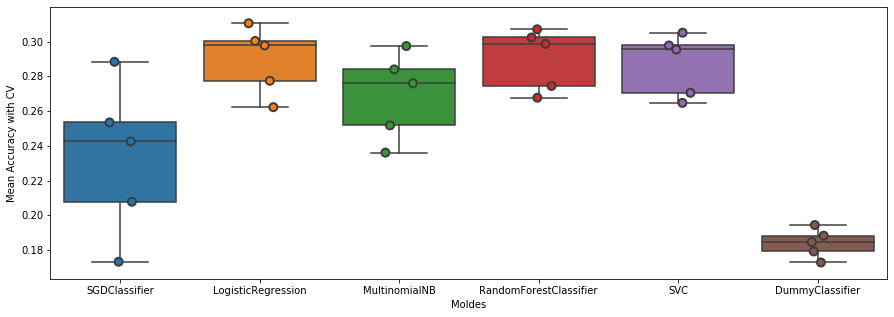

In [85]:
import seaborn as sns
plt.figure(figsize=(15,5))

ax=sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
ax.set(xlabel='Moldes', ylabel='Mean Accuracy with CV')
plt.show()

In [86]:
stop = timeit.default_timer()
print("total time of notebook execution %0.fs" % (stop - start))

total time of notebook execution 2814s


Unfortunately, we did not do better with TfidfVectorizer.


**The best score achived is around 60%**